# **CUSTOMER** **CHURN PREDICTION for Banking dataset- ABC multinational**



```
`# This is formatted as code`
```
Every bank wants to hold there customers for sustaining their business so the ABC Multinational bank.

The customer data of account holders at ABC Multinational Bank and the aim of the data will be predicting the Customer Churn.
The raw data contains  10000 rows (customers) and 11 columns (features).

Customer_id, unused variable.
credit_score, used as input.
country, used as input.
gender, used as input.
age, used as input.
tenure, used as input.
balance, used as input.
products_number, used as input.
credit_card, used as input.
active_member, used as input.
estimated_salary, used as input.
churn, used as the target.
1 if the client has left the bank during some period or 0 if he/she has not.
Aim is to Predict the Customer Churn for ABC Bank.



# 1. Importing libraries and header files

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install qbstyles

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from qbstyles import mpl_style
#plt.style.use('cyberpunk')
mpl_style(dark = True)
#sns.set_style('darkgrid')
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import skew
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score, accuracy_score, roc_auc_score,f1_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
!pip install catboost
import catboost as cb
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')
palette1 = ['#90A6B1', '#037d97','#E4591E']
palette2 = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']
palette3 = ['#90A6B1', '#037d97', '#C09741']


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.4 MB/s eta 0:00:00


# 2. Importing the Data

In [ ]:
df= pd.read_csv("/content/Bank Customer Churn Prediction.csv")

# 3. Understanding the data

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.info

<bound method DataFrame.info of       customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]>

In [ ]:
df.columns.values

array(['customer_id', 'credit_score', 'country', 'gender', 'age',
       'tenure', 'balance', 'products_number', 'credit_card',
       'active_member', 'estimated_salary', 'churn'], dtype=object)

In [ ]:
df.describe().round(2)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


# 4. Preprocessing the data

To Delete the missing value, Axis =0 , to delete missing NAN in the rows.

In [ ]:
df.drop(['customer_id'], axis=1, inplace=True)

In [ ]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

# EDA

In [ ]:
def split_cats_nums(dataset):
    categoricals = []
    numericals = []
    for i in dataset.columns:
        if len(dataset[i].unique()) > 5:
            numericals.append(i)
        else:
            categoricals.append(i)
    categoricals = [t for t in categoricals if t!="churn"]
    return categoricals, numericals
categoricals,numericals = split_cats_nums(df)

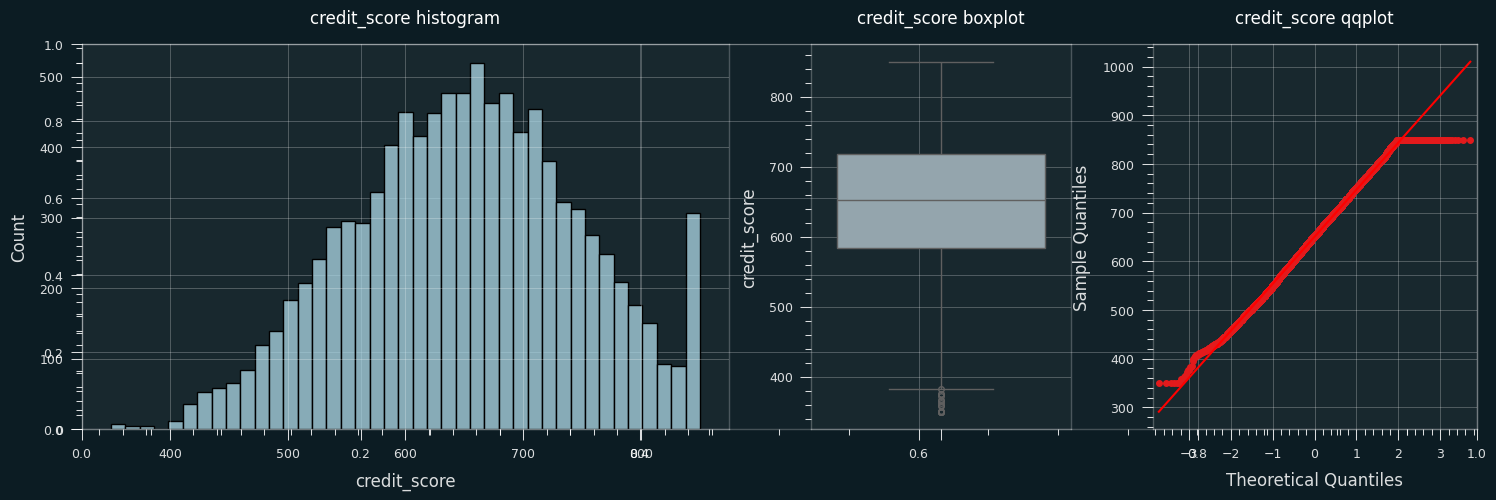

The skewness value for the credit_score is -0.07159586676212397


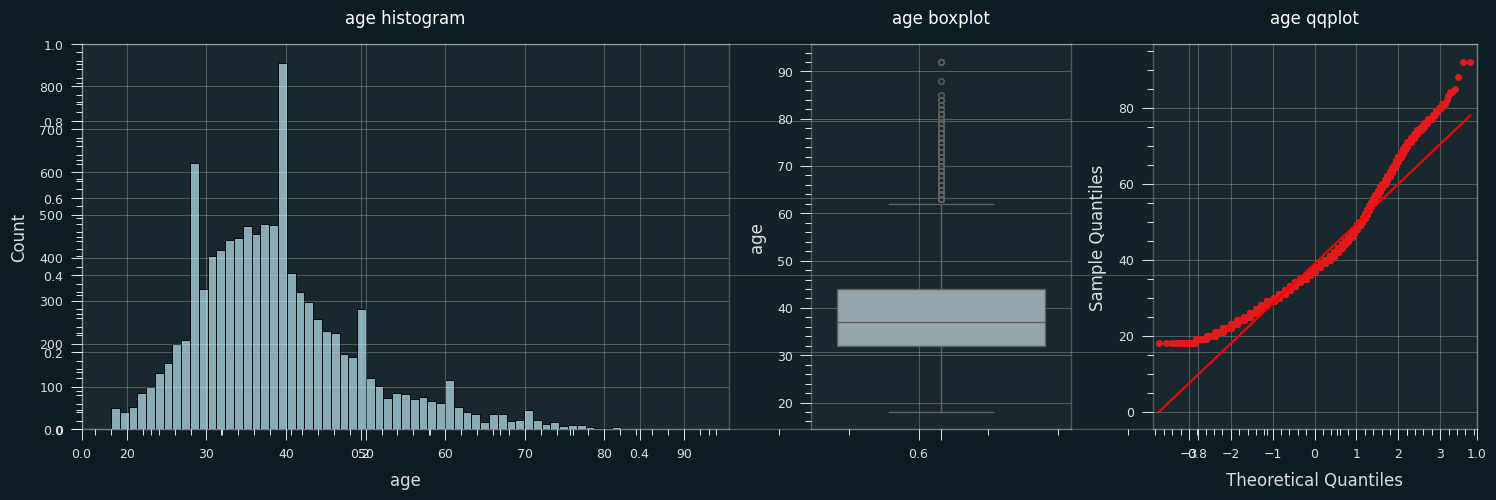

The skewness value for the age is 1.0111685586628079


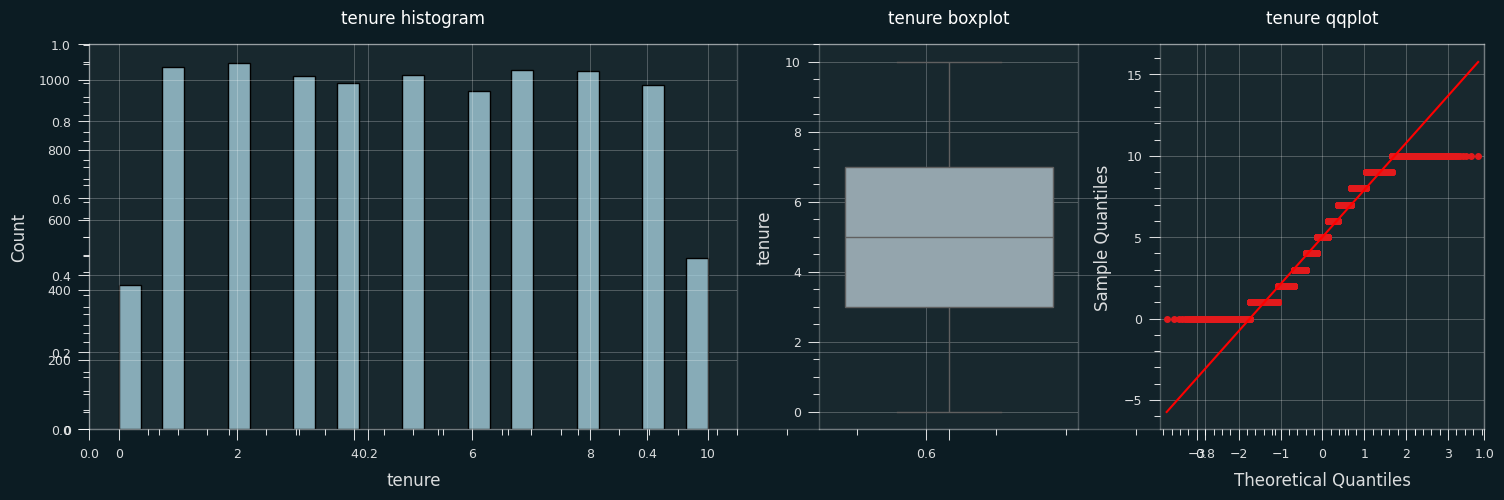

The skewness value for the tenure is 0.010989809189781041


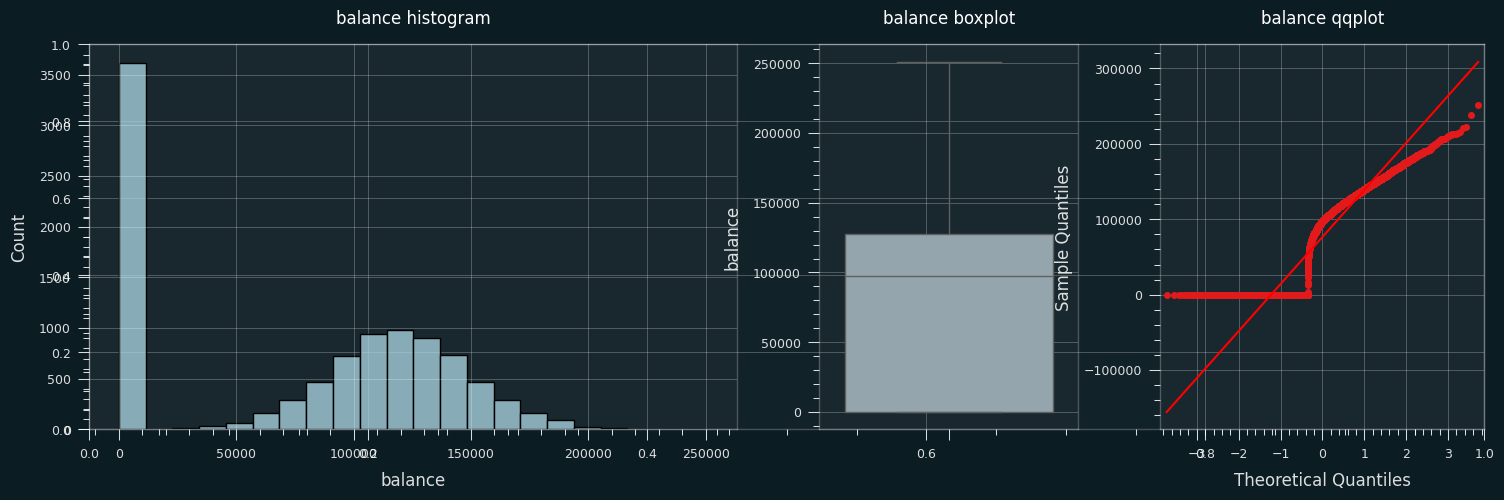

The skewness value for the balance is -0.14108754375291138


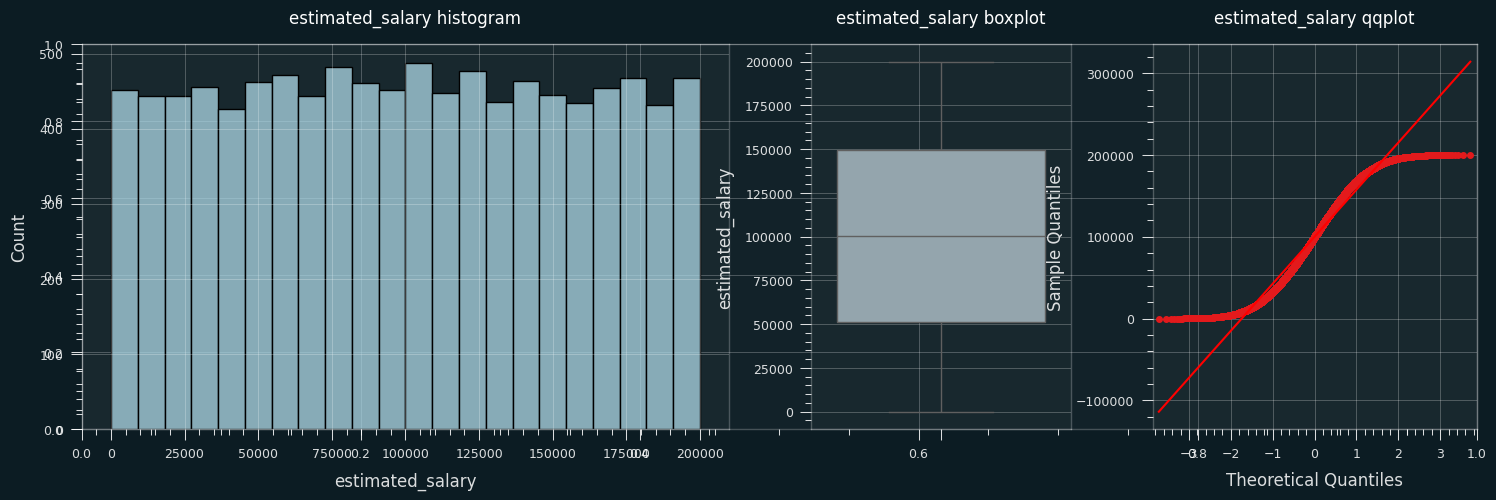

The skewness value for the estimated_salary is 0.0020850448448748848


In [ ]:
def generate_numerical_viz(data):
    for i in data[numericals]:
        fig, axes = plt.subplots(1,3,figsize = (18,5),gridspec_kw={'width_ratios': [2, 0.8,1]})
        sns.histplot(data[i],ax=axes[0],color = 'lightblue')
        axes[0].set_title(f"{i} histogram")
        sns.boxplot(data[i],ax=axes[1],palette = palette1)
        axes[1].set_title(f"{i} boxplot")
        qqplot(data[i],ax = axes[2],line="s")
        axes[2].set_title(f"{i} qqplot")
        plt.show()
        print(f"The skewness value for the {i} is {skew(data[i])}")
generate_numerical_viz(df)

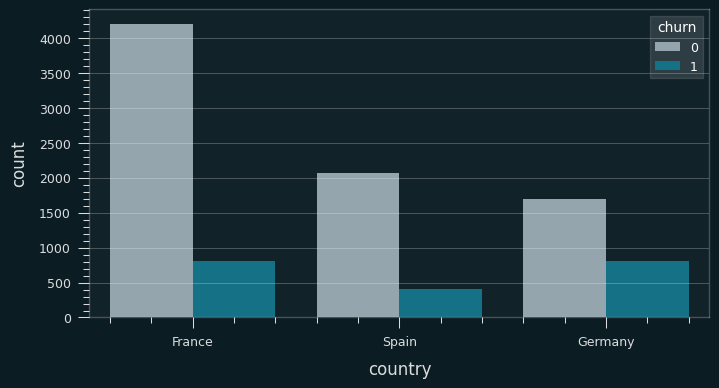

16.15% of customers from France has churned. 
16.67% of customers from Spain has churned. 
32.44% of customers from Germany has churned. 


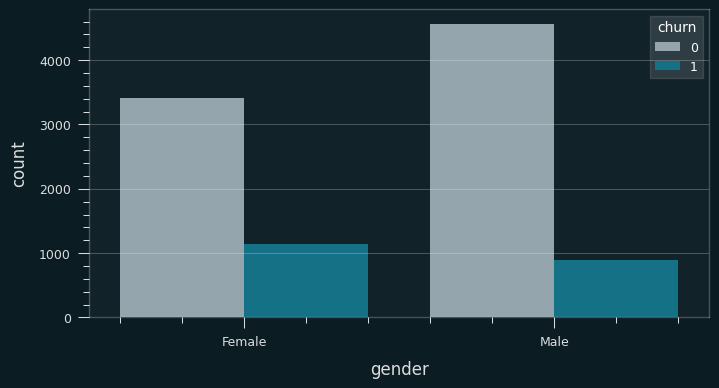

25.07% of customers who are Female has churned. 
16.46% of customers who are Male has churned. 


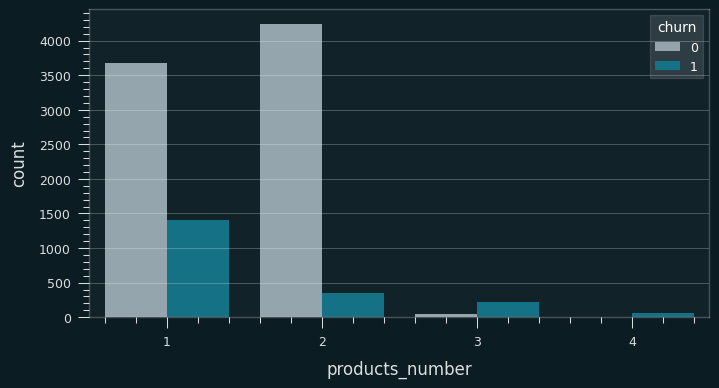

27.71% of customers who use 1 products_number has churned. 
82.71% of customers who use 3 products_number has churned. 
7.58% of customers who use 2 products_number has churned. 
100.0% of customers who use 4 products_number has churned. 


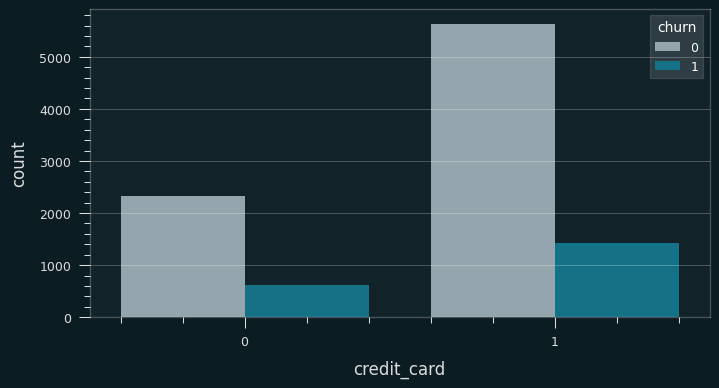

20.18% of customers who use 1 credit_card has churned. 
20.81% of customers who use 0 credit_card has churned. 


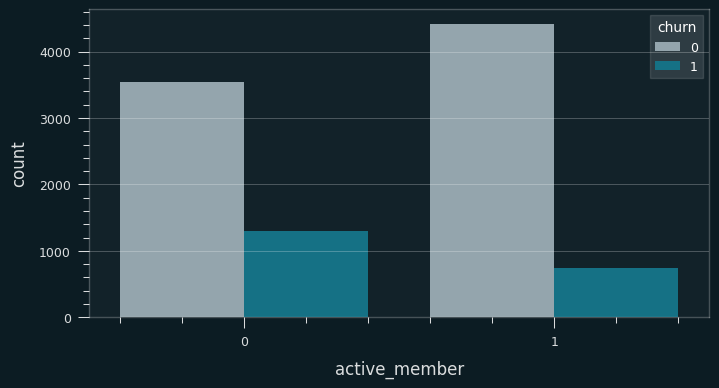

14.27% of customers who are 1 has churned. 
26.85% of customers who are 0 has churned. 


In [ ]:
def generate_cat_viz(data):
    for i in categoricals:
        plt.figure(figsize=(8,4))
        sns.countplot(data = data, x = i ,hue = "churn",palette = palette3)
        plt.show()
        for x in data[i].unique():
            churn_pcnt = len(data[(data[i] == x) & (data["churn"] == 1)]) / len(data[data[i]==x]) *100
            churn_pcnt = round(churn_pcnt,2)
            if i =="country":
                print(f"{churn_pcnt}% of customers from {x} has churned. ")
            elif i not in(["credit_card","products_number"]):
                print(f"{churn_pcnt}% of customers who are {x} has churned. ")
            else:
                print(f"{churn_pcnt}% of customers who use {x} {i} has churned. ")
generate_cat_viz(df)

<Axes: xlabel='active_member', ylabel='Count'>

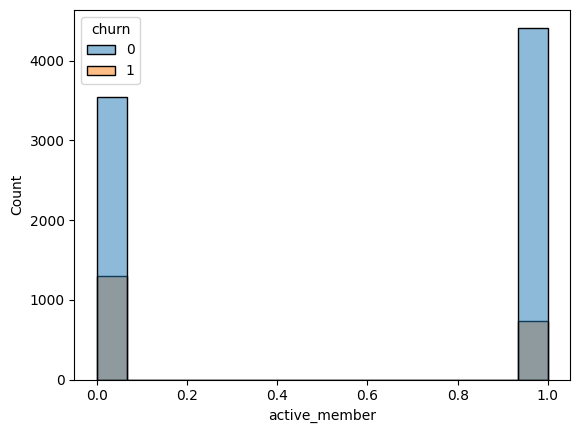

In [ ]:
sns.histplot(
    data=df,
    x="active_member",
    hue="churn")

<Axes: xlabel='credit_score'>

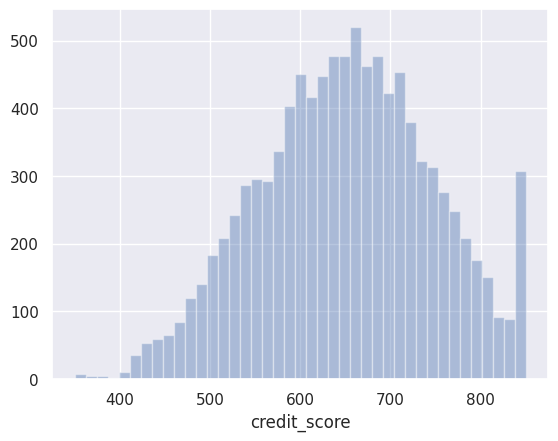

In [ ]:
sns.set(style="darkgrid")

sns.distplot( a=df["credit_score"],hist=True, kde=False, rug=False )

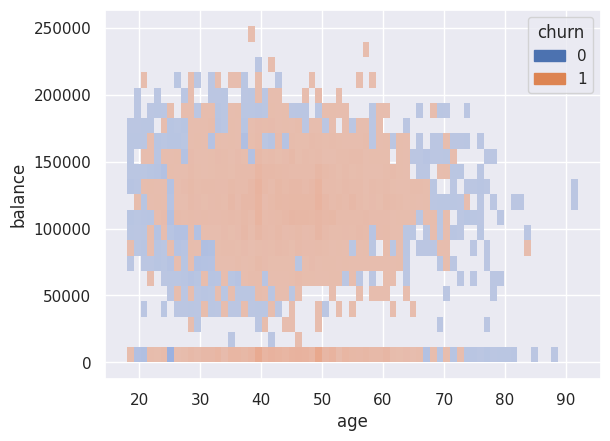

In [ ]:
sns.histplot(
    data=df,
    x="age",
    y="balance",
    hue="churn",
)
plt.show()

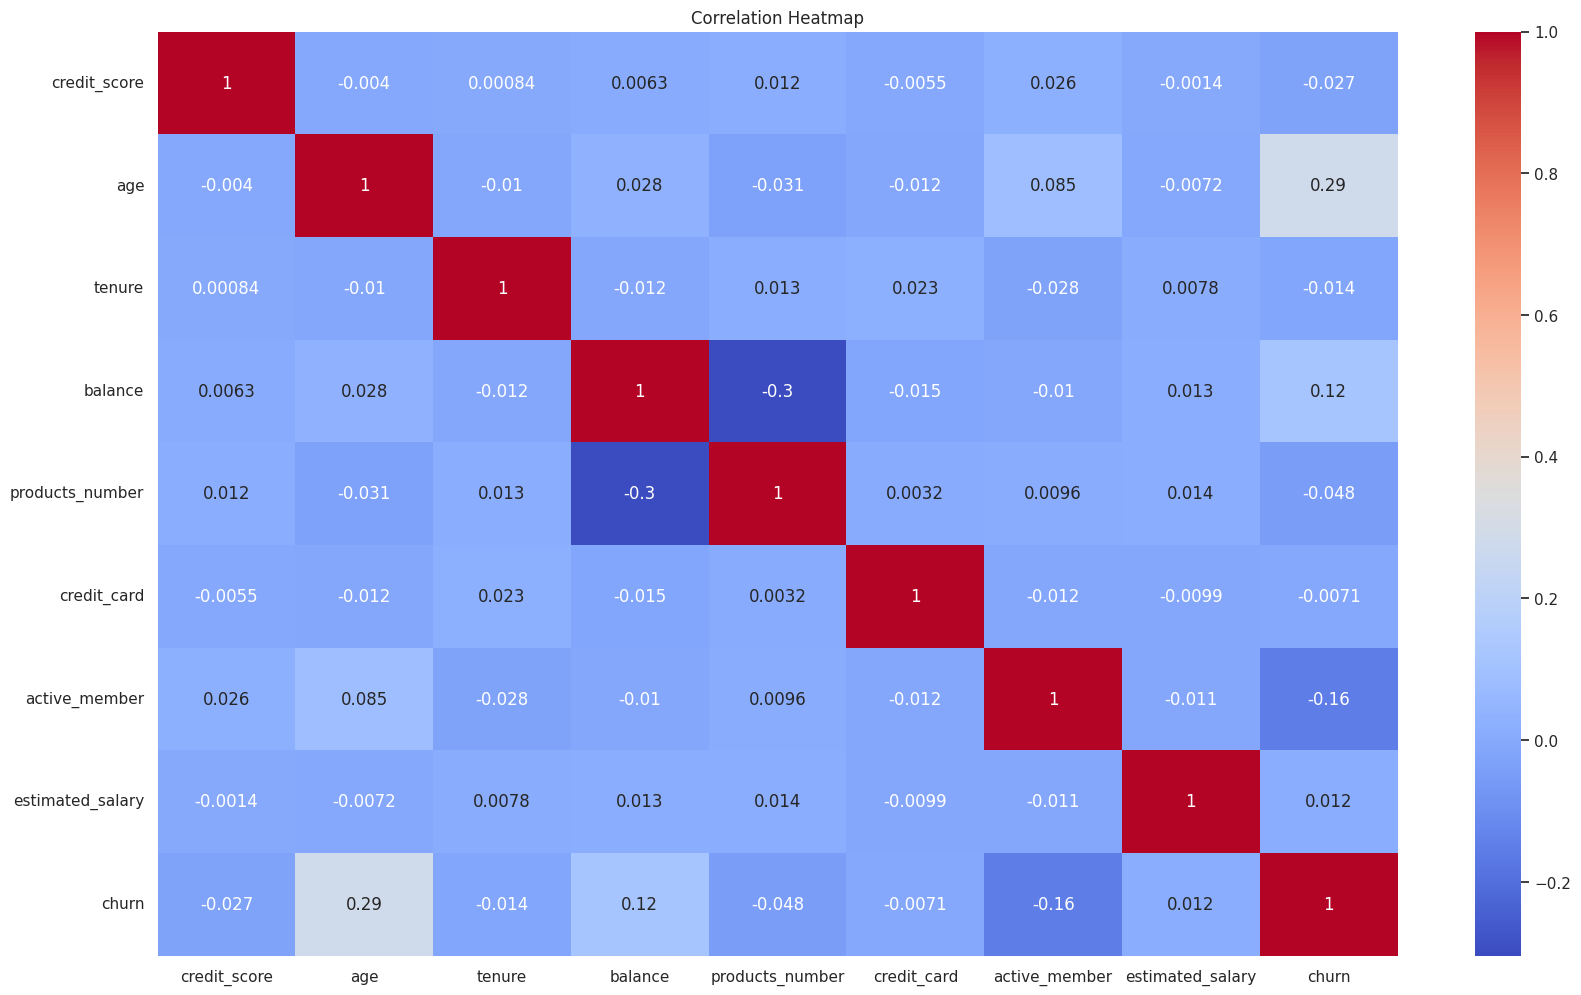

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
# We are classifying the country name in 0,1,2 and similiarly male and female as 0 and 1 respectively.

In [ ]:
df['country'] = df['country'].map({'France': 0, 'Spain' : 1,'Germany':2})
df['gender'] = df['gender'].map({'Male': 0, 'Female' : 1})
df['balance']=df['balance'].astype(int)
df['estimated_salary']=df['estimated_salary'].astype(int)
df['country'].dtypes

dtype('int64')

<Axes: xlabel='balance', ylabel='country'>

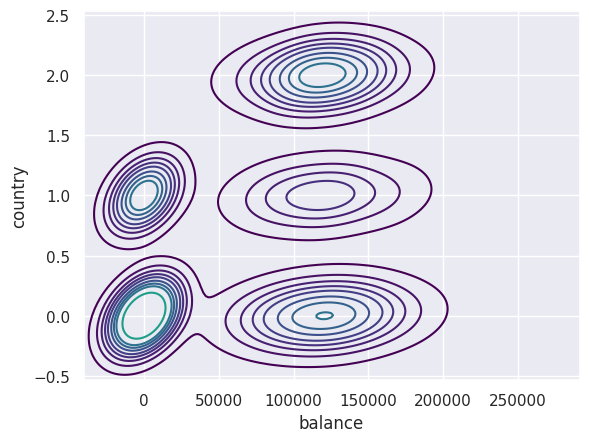

In [ ]:
sns.kdeplot(
    data=df,
    x="balance",
    y="country",
    cmap="viridis")

<Axes: xlabel='balance', ylabel='country'>

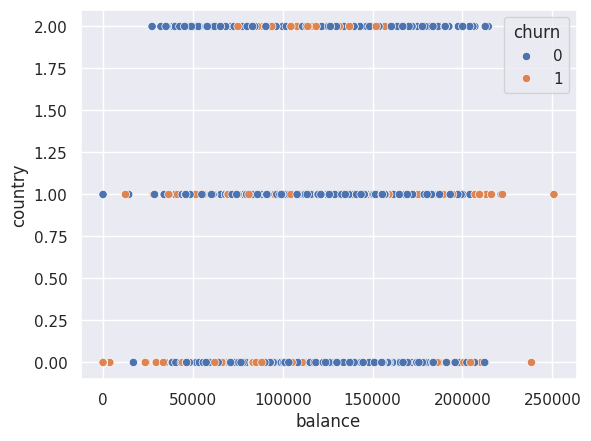

In [ ]:
sns.scatterplot(
    data=df,
    x="balance",
    y="country",
    hue="churn"
)

<Axes: xlabel='products_number', ylabel='balance'>

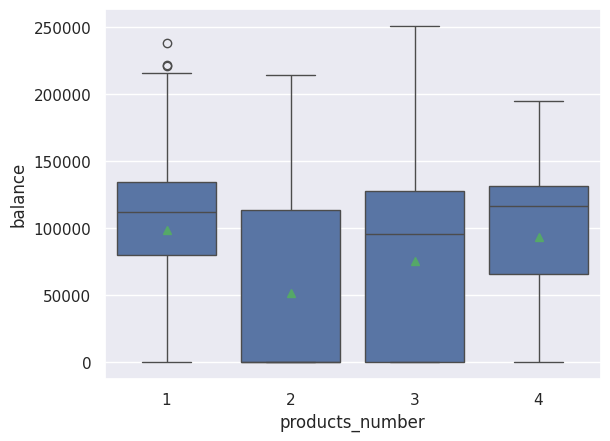

In [ ]:
sns.boxplot(
    x="products_number",
    y="balance",
    showmeans=True,
    data=df
)

<Axes: xlabel='country', ylabel='Count'>

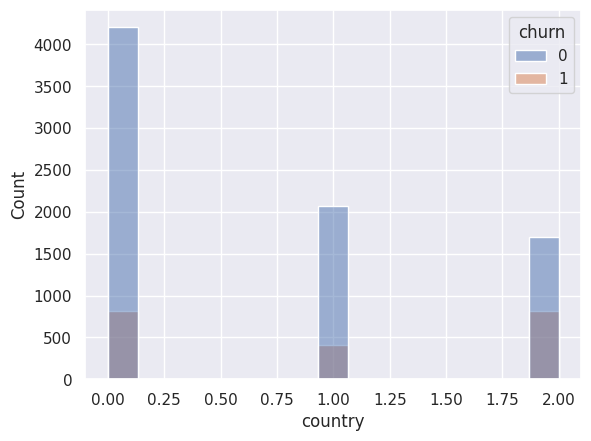

In [ ]:
sns.histplot(
    data=df,
    x="country",
    hue="churn")

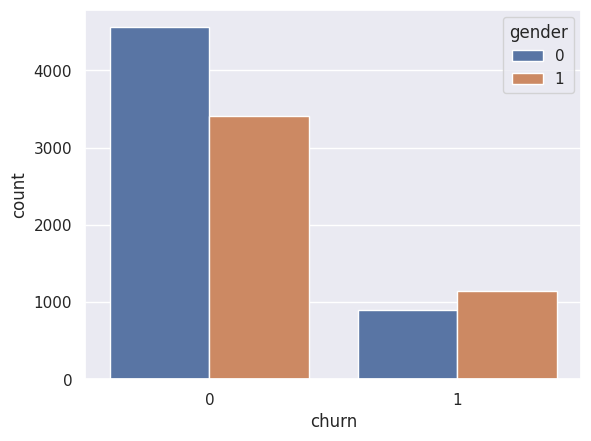

In [ ]:
sns.countplot(x="churn",hue="gender", data=df)
plt.show()

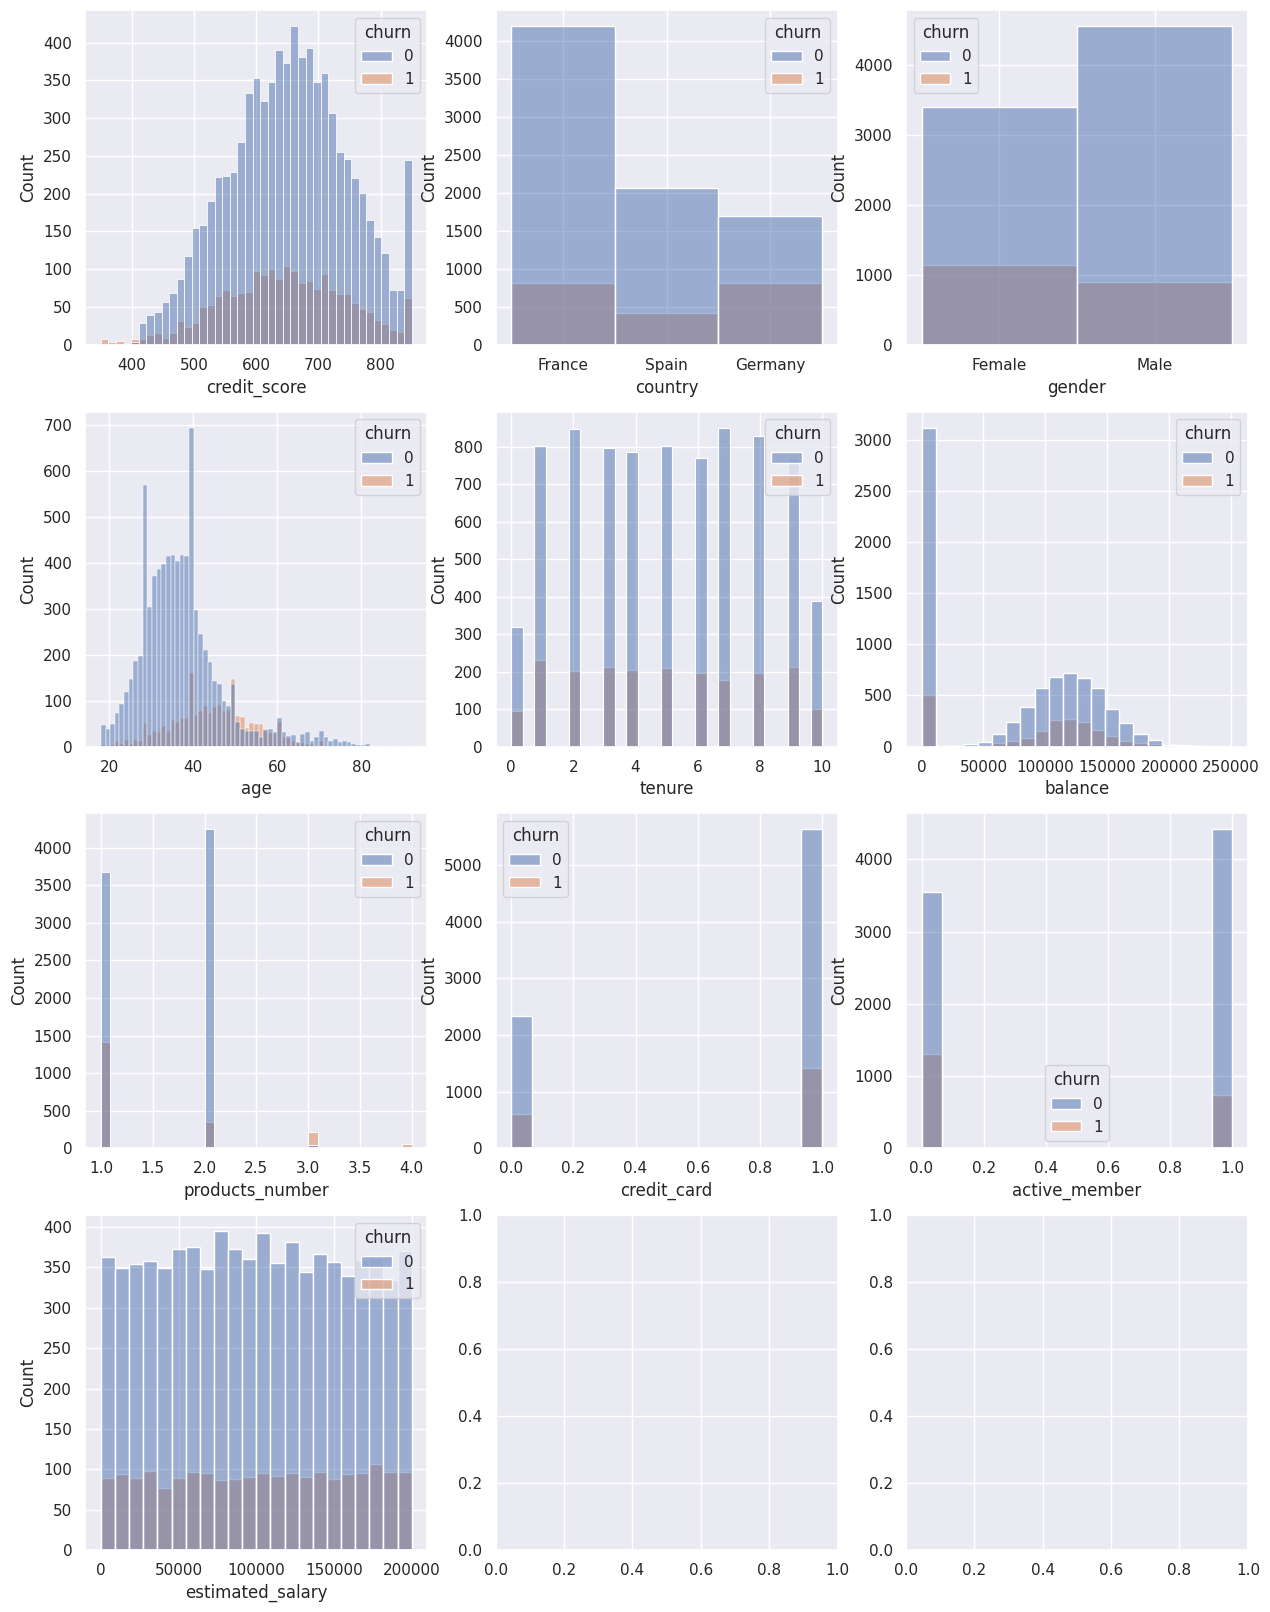

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
axs=axs.flat
for i in range(len(df.columns)-1):
    sns.histplot(data=df, x=df.columns[i],hue="churn",ax=axs[i])

In [ ]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Modeling

In [ ]:
x=df.drop(columns='churn')
y=df['churn']
x.shape

(10000, 10)

In [ ]:
y.shape

(10000,)

In [ ]:
x

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [ ]:
x_train.shape

(7000, 10)

In [ ]:
y_train.shape

(7000,)

In [ ]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(7000, 10) (3000, 10) (7000,) (3000,)


# Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x_train['country'] = le.fit_transform(x_train['country'])
x_test['country'] = le.transform(x_test['country'])
x_train['gender'] = le.fit_transform(x_train['gender'])
x_test['gender'] = le.transform(x_test['gender'])

In [ ]:
x_train

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
6088,661,0,0,30,7,0.00,2,1,0,72196.57
6513,513,2,0,41,9,107135.04,2,1,1,160546.58
4436,508,0,1,26,7,205962.00,1,1,0,156424.40
4983,543,0,1,30,4,140916.81,1,1,0,157711.18
467,816,1,0,38,5,130878.75,3,1,0,71905.77
...,...,...,...,...,...,...,...,...,...,...
4706,850,0,1,43,4,161256.53,1,1,1,140071.57
2706,696,0,1,22,9,149777.00,1,1,1,198032.93
8273,675,0,1,32,1,0.00,3,1,0,85901.09
2361,686,1,0,43,5,154846.24,2,1,1,151903.60


In [ ]:
sc= StandardScaler()
x_train_rescaled = sc.fit_transform(x_train)
x_test_rescaled = sc.transform(x_test)
x_train_rescaled

array([[ 0.10792653, -0.90798563, -1.09759938, ...,  0.64420415,
        -1.03311959, -0.47054757],
       [-1.42985211,  1.50137729, -1.09759938, ...,  0.64420415,
         0.96794215,  1.06074123],
       [-1.48180409, -0.90798563,  0.91107923, ...,  0.64420415,
        -1.03311959,  0.98929531],
       ...,
       [ 0.25339208, -0.90798563,  0.91107923, ...,  0.64420415,
        -1.03311959, -0.23301983],
       [ 0.36768644,  0.29669583, -1.09759938, ...,  0.64420415,
         0.96794215,  0.91094047],
       [ 0.27417287, -0.90798563, -1.09759938, ...,  0.64420415,
         0.96794215,  0.94041956]])

In [ ]:
print(x_train_rescaled)

[[ 0.10792653 -0.90798563 -1.09759938 ...  0.64420415 -1.03311959
  -0.47054757]
 [-1.42985211  1.50137729 -1.09759938 ...  0.64420415  0.96794215
   1.06074123]
 [-1.48180409 -0.90798563  0.91107923 ...  0.64420415 -1.03311959
   0.98929531]
 ...
 [ 0.25339208 -0.90798563  0.91107923 ...  0.64420415 -1.03311959
  -0.23301983]
 [ 0.36768644  0.29669583 -1.09759938 ...  0.64420415  0.96794215
   0.91094047]
 [ 0.27417287 -0.90798563 -1.09759938 ...  0.64420415  0.96794215
   0.94041956]]


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_rescaled, y_train)

In [ ]:
x_test_rescaled

array([[-0.02714862, -0.90798563, -1.09759938, ...,  0.64420415,
        -1.03311959,  1.64469932],
       [-0.54666843,  0.29669583,  0.91107923, ...,  0.64420415,
         0.96794215, -0.40533513],
       [-0.80642834,  0.29669583, -1.09759938, ..., -1.55230294,
         0.96794215,  1.12125599],
       ...,
       [ 0.39885762,  0.29669583, -1.09759938, ...,  0.64420415,
        -1.03311959,  0.34514778],
       [ 0.32612485, -0.90798563, -1.09759938, ...,  0.64420415,
         0.96794215,  1.65970873],
       [ 1.07423338,  1.50137729,  0.91107923, ...,  0.64420415,
         0.96794215, -1.55446352]])

# Random Forest Model

In [ ]:
classifier = RandomForestClassifier( n_estimators=100,criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,)
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = classifier.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred)*100)

Accuracy: 84.46666666666667


# XGBClassifier

In [ ]:
xgb=XGBClassifier(n_estimators=480, learning_rate=0.2, max_depth=8)
xgb.fit(x_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=480, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_y_pred=xgb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred)*100)

Accuracy: 85.23333333333333


# Logisitic Regression

SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
data = pd.read_csv("customer_churn.csv")

# Separate features and target
features = data.drop("Churn", axis=1)
target = data["Churn"]

# Preprocess the data (e.g., scaling, encoding categorical variables)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

# Train the SVM classifier
model = SVC(kernel="linear")
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [ ]:
def RunModel(classifier,x_train_resampled,y_train_resampled,x_test,y_test):

    classifier.fit(x_train_resampled,y_train_resampled)
    pred = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    cr_v_sc = cross_val_score(classifier,x_train_resampled,y_train_resampled,cv = cv,scoring = 'roc_auc')
    r_a_s = roc_auc_score(y_test,pred)
    print("Cross Validation Score : ",'{0:.2%}'.format(cr_v_sc.mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(r_a_s))



def model_evaluation(classifier,x_test,y_test):

    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.3%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = ['#20B2AA','#48D1CC'],fmt ='')

    print(classification_report(y_test,classifier.predict(x_test)))

In [ ]:
LR = LogisticRegression()
RunModel(LR, x_train, y_train, x_test, y_test)

Cross Validation Score :  66.03%
ROC_AUC Score :  52.05%


              precision    recall  f1-score   support

           0       0.81      0.98      0.88      2395
           1       0.41      0.06      0.11       605

    accuracy                           0.79      3000
   macro avg       0.61      0.52      0.50      3000
weighted avg       0.73      0.79      0.73      3000



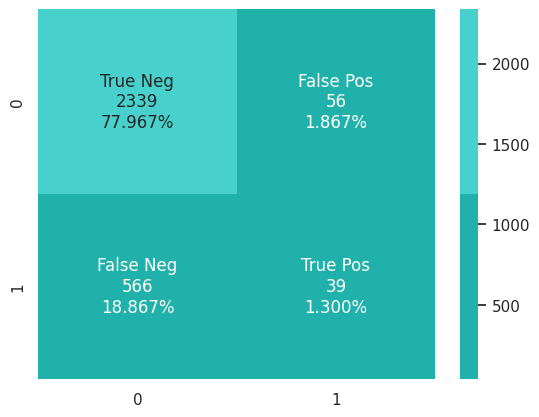

In [ ]:
model_evaluation(LR,x_test,y_test)

# ANN

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.biases_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.biases_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        # Forward pass
        self.hidden_activation = self.sigmoid(np.dot(inputs, self.weights_input_hidden) + self.biases_hidden)
        self.output = self.sigmoid(np.dot(self.hidden_activation, self.weights_hidden_output) + self.biases_output)
        return self.output

    def backward(self, inputs, targets, learning_rate):
        # Backward pass
        output_error = targets - self.output
        output_delta = output_error * self.sigmoid_derivative(self.output)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_activation)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_activation.T.dot(output_delta) * learning_rate
        self.biases_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += inputs.T.dot(hidden_delta) * learning_rate
        self.biases_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, inputs, targets, epochs, learning_rate):
        for i in range(epochs):
            self.forward(inputs)
            self.backward(inputs, targets, learning_rate)
            if i % 100 == 0:
                loss = np.mean(np.square(targets - self.output))
                print(f'Epoch {i}, Loss: {loss}')

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=x_train.shape[1], activation='relu'))  # Input layer + first hidden layer
model.add(Dense(8, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# 3. Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. Training the model
model.fit(x_train, y_train, epochs=100, batch_size=64)

# 5. Evaluating the model
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy:', accuracy)

Epoch 1/100
110/110 [==============================] - 2s 3ms/step - loss: 182.5237 - accuracy: 0.6783
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 77.2444 - accuracy: 0.6789
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 39.9983 - accuracy: 0.6844
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 27.1411 - accuracy: 0.6927
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 21.4718 - accuracy: 0.6894
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 23.0367 - accuracy: 0.6913
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 27.1706 - accuracy: 0.6854
Epoch 8/100
110/110 [==============================] - 0s 3ms/step - loss: 27.2778 - accuracy: 0.6890
Epoch 9/100
110/110 [==============================] - 0s 3ms/step - loss: 26.3876 - accuracy: 0.6890
Epoch 10/100
110/110 [==============================] - 0s 3ms/step - loss: 20.76

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                132       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 245 (980.00 Byte)
Trainable params: 245 (980.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Assuming x_train, y_train, x_test, y_test are your training and testing data

# 1. Apply SMOTE to oversample the minority class in the training data
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# 2. Define and compile your neural network model
model = Sequential()
model.add(Dense(12, input_dim=x_train_resampled.shape[1], activation='relu'))  # Input layer + first hidden layer
model.add(Dense(8, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3. Train the model on the resampled data
model.fit(x_train_resampled, y_train_resampled, epochs=1000, batch_size=64)

# 4. Evaluate the model on the original test data
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy:', accuracy)


Epoch 1/1000
175/175 [==============================] - 3s 5ms/step - loss: 1015.6531 - accuracy: 0.5164
Epoch 2/1000
175/175 [==============================] - 1s 5ms/step - loss: 15.8284 - accuracy: 0.4982
Epoch 3/1000
175/175 [==============================] - 1s 4ms/step - loss: 10.8201 - accuracy: 0.4942
Epoch 4/1000
175/175 [==============================] - 1s 4ms/step - loss: 12.3368 - accuracy: 0.4929
Epoch 5/1000
175/175 [==============================] - 1s 4ms/step - loss: 12.8754 - accuracy: 0.4889
Epoch 6/1000
175/175 [==============================] - 1s 4ms/step - loss: 9.8681 - accuracy: 0.5021
Epoch 7/1000
175/175 [==============================] - 1s 4ms/step - loss: 9.5271 - accuracy: 0.4943
Epoch 8/1000
175/175 [==============================] - 1s 4ms/step - loss: 11.9256 - accuracy: 0.5326
Epoch 9/1000
175/175 [==============================] - 1s 8ms/step - loss: 10.4025 - accuracy: 0.5341
Epoch 10/1000
175/175 [==============================] - 2s 9ms/step - lo